[*********************100%***********************]  1 of 1 completed


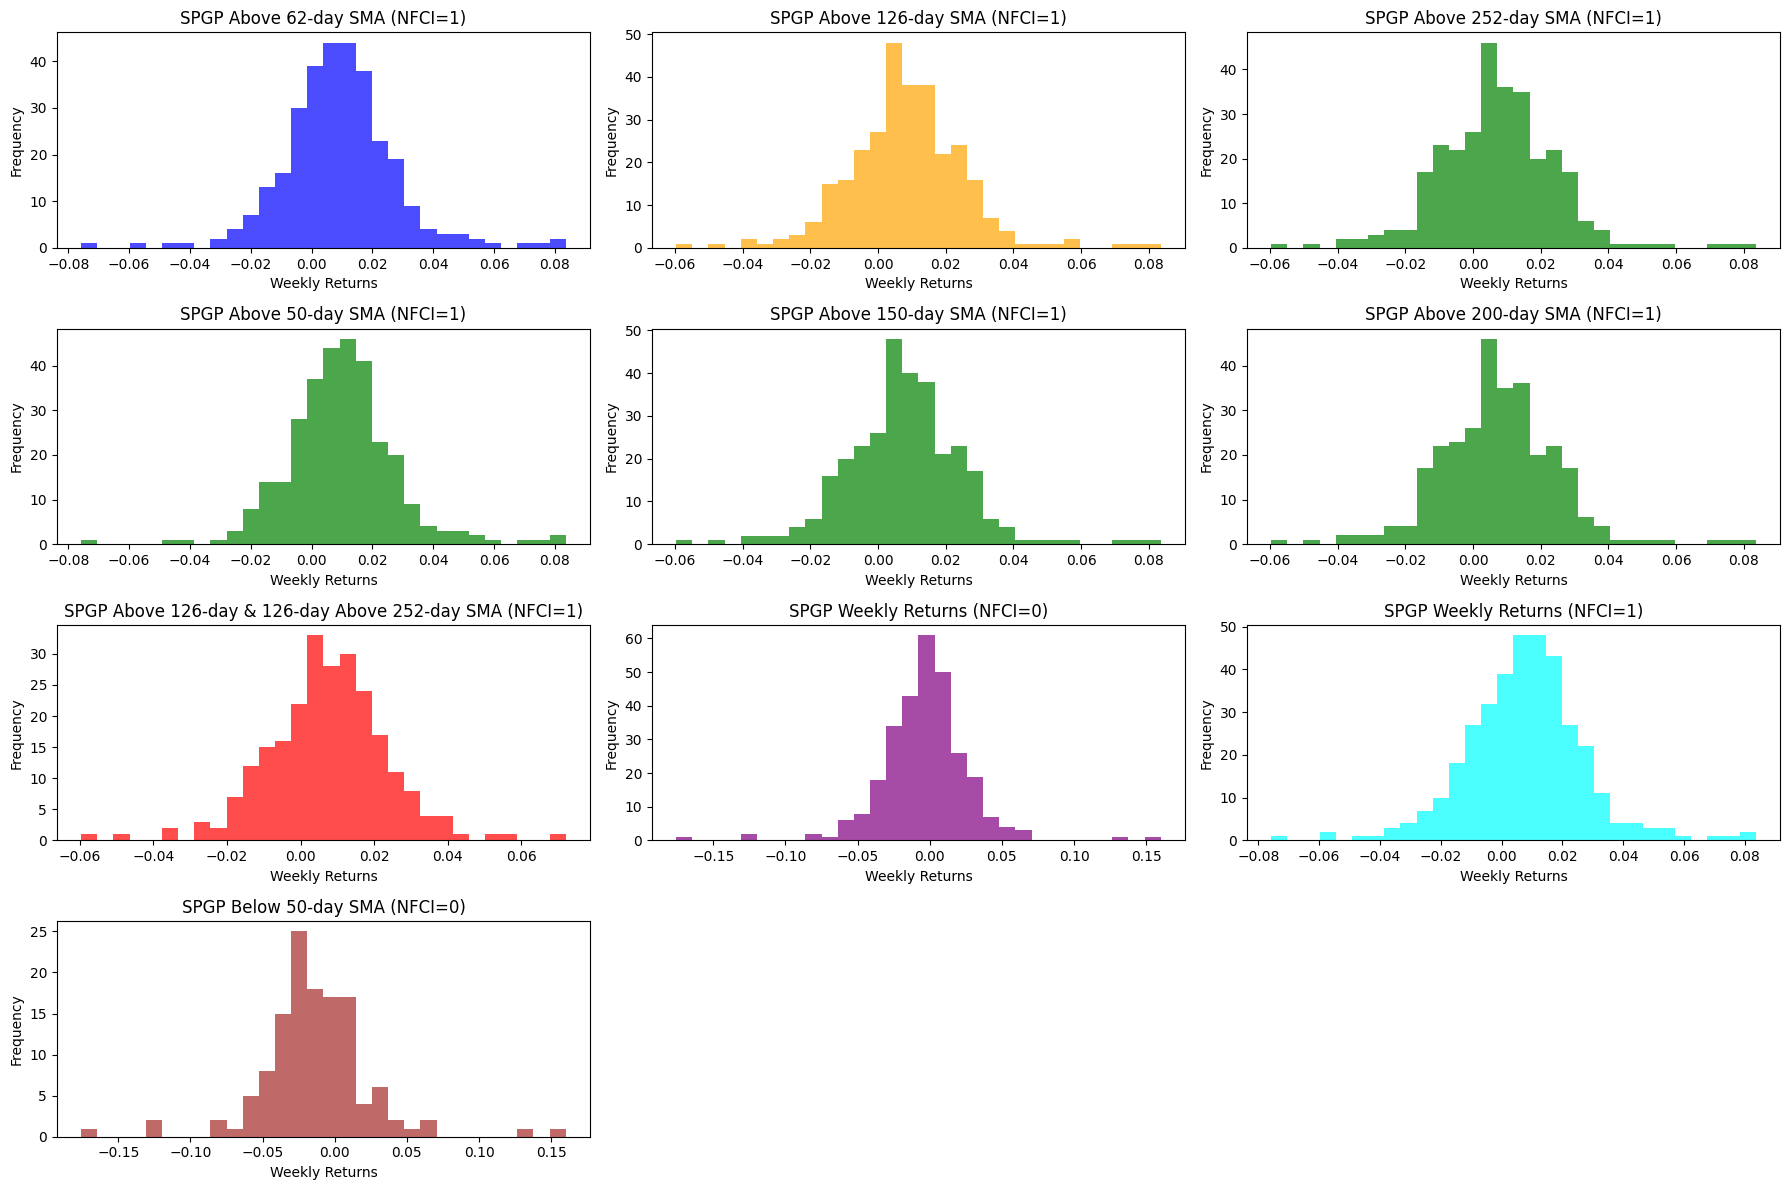

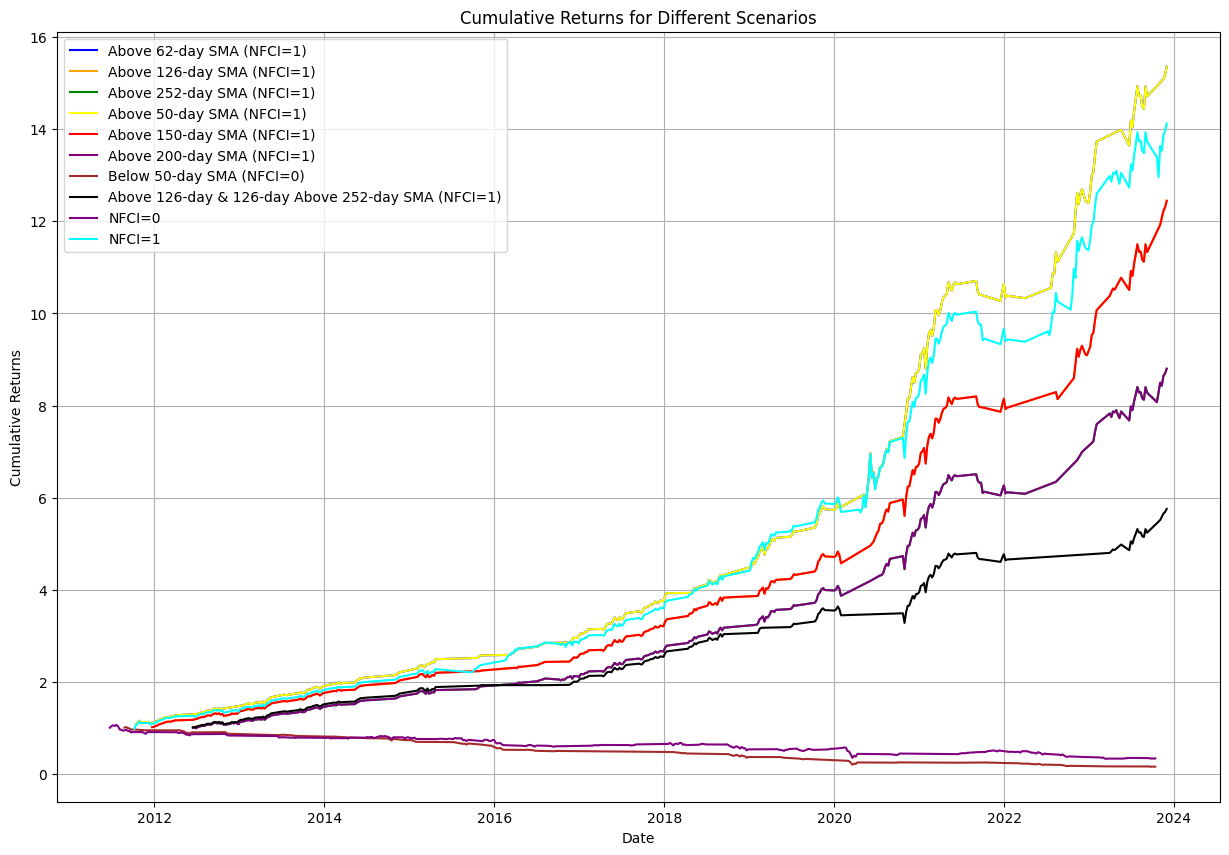

Expected Weekly Return (EV) when SPGP is above 62-day SMA and NFCI=1: 0.0091
Expected Weekly Return (EV) when SPGP is above 126-day SMA and NFCI=1: 0.0085
Expected Weekly Return (EV) when SPGP is above 252-day SMA and NFCI=1: 0.0075
Expected Weekly Return (EV) when SPGP is above 50-day SMA and NFCI=1: 0.0097
Expected Weekly Return (EV) when SPGP is above 150-day SMA and NFCI=1: 0.0078
Expected Weekly Return (EV) when SPGP is above 200-day SMA and NFCI=1: 0.0076
Expected Weekly Return (EV) when SPGP is above 126-day SMA and 126-day SMA is above 252-day SMA and NFCI=1: 0.0073
Expected Weekly Return (EV) when SPGP is below 50-day SMA and NFCI=0: -0.0134
Expected Weekly Return (EV) when NFCI signal is 0: -0.0033
Expected Weekly Return (EV) when NFCI signal is 1: 0.0075


In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Download SPGP data
spgp_data = yf.download('SPGP', start='2000-01-01')['Close']

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)

# Calculate the 2-weeks moving average for NFCI and shift it
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()
nfci_data['nfci_sma_14_shifted'] = nfci_data['nfci_sma_14'].shift(1)

# Calculate the SMAs for SPGP on daily data
sma_62 = spgp_data.rolling(window=62).mean()
sma_126 = spgp_data.rolling(window=126).mean()
sma_252 = spgp_data.rolling(window=252).mean()
sma_50 = spgp_data.rolling(window=50).mean()
sma_150 = spgp_data.rolling(window=150).mean()
sma_200 = spgp_data.rolling(window=200).mean()
sma_100 = spgp_data.rolling(window=100).mean()

# Resample SPGP data and SMA data to weekly frequency
spgp_weekly = spgp_data.resample('W-FRI').last()
spgp_weekly_returns = spgp_weekly.pct_change()

weekly_sma_62 = sma_62.resample('W-FRI').last()
weekly_sma_126 = sma_126.resample('W-FRI').last()
weekly_sma_252 = sma_252.resample('W-FRI').last()
weekly_sma_50 = sma_50.resample('W-FRI').last()
weekly_sma_150 = sma_150.resample('W-FRI').last()
weekly_sma_200 = sma_200.resample('W-FRI').last()
weekly_sma_100 = sma_100.resample('W-FRI').last()

# Align NFCI data with weekly SPGP data
aligned_nfci_data = nfci_data.reindex(spgp_weekly.index, method='ffill')

# Create a signal based on NFCI data
aligned_nfci_data['signal'] = np.where(aligned_nfci_data['NFCI'] < aligned_nfci_data['nfci_sma_14_shifted'], 1, 0)

# Determine the conditions for SMA and NFCI signal
above_62 = spgp_weekly > weekly_sma_62
above_126 = spgp_weekly > weekly_sma_126
above_252 = spgp_weekly > weekly_sma_252
above_50 = spgp_weekly > weekly_sma_50
below_50 = spgp_weekly < weekly_sma_50
above_150 = spgp_weekly > weekly_sma_150
above_200 = spgp_weekly > weekly_sma_200
above_126_and_252 = (spgp_weekly > weekly_sma_126) & (weekly_sma_126 > weekly_sma_252)

nfci_signal_0 = aligned_nfci_data['signal'] == 0
nfci_signal_1 = aligned_nfci_data['signal'] == 1

# Filter the weekly returns based on the conditions
returns_above_62 = spgp_weekly_returns[above_62 & nfci_signal_1]
returns_above_126 = spgp_weekly_returns[above_126 & nfci_signal_1]
returns_above_252 = spgp_weekly_returns[above_252 & nfci_signal_1]
returns_above_50 = spgp_weekly_returns[above_50 & nfci_signal_1]
returns_above_150 = spgp_weekly_returns[above_150 & nfci_signal_1]
returns_above_200 = spgp_weekly_returns[above_200 & nfci_signal_1]
returns_above_126_and_252 = spgp_weekly_returns[above_126_and_252 & nfci_signal_1]
returns_nfci_0_and_below_50 = spgp_weekly_returns[below_50 & nfci_signal_0]

returns_nfci_0 = spgp_weekly_returns[nfci_signal_0]
returns_nfci_1 = spgp_weekly_returns[nfci_signal_1]
# Plot histograms
plt.figure(figsize=(18, 12))

# Histograms for SMA conditions with NFCI signal 1
plt.subplot(4, 3, 1)
plt.hist(returns_above_62.dropna(), bins=30, alpha=0.7, color='blue')
plt.title('SPGP Above 62-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 2)
plt.hist(returns_above_126.dropna(), bins=30, alpha=0.7, color='orange')
plt.title('SPGP Above 126-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 3)
plt.hist(returns_above_252.dropna(), bins=30, alpha=0.7, color='green')
plt.title('SPGP Above 252-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 4)
plt.hist(returns_above_50.dropna(), bins=30, alpha=0.7, color='green')
plt.title('SPGP Above 50-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 5)
plt.hist(returns_above_150.dropna(), bins=30, alpha=0.7, color='green')
plt.title('SPGP Above 150-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 6)
plt.hist(returns_above_200.dropna(), bins=30, alpha=0.7, color='green')
plt.title('SPGP Above 200-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 7)
plt.hist(returns_above_126_and_252.dropna(), bins=30, alpha=0.7, color='red')
plt.title('SPGP Above 126-day & 126-day Above 252-day SMA (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

# Histograms for NFCI signal conditions
plt.subplot(4, 3, 8)
plt.hist(returns_nfci_0.dropna(), bins=30, alpha=0.7, color='purple')
plt.title('SPGP Weekly Returns (NFCI=0)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

plt.subplot(4, 3, 9)
plt.hist(returns_nfci_1.dropna(), bins=30, alpha=0.7, color='cyan')
plt.title('SPGP Weekly Returns (NFCI=1)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')

# Add a histogram for the new condition
plt.subplot(4, 3, 10)  # Adjust the subplot dimensions as needed
plt.hist(returns_nfci_0_and_below_50.dropna(), bins=30, alpha=0.7, color='brown')
plt.title('SPGP Below 50-day SMA (NFCI=0)')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


# Calculate cumulative returns for each condition
cumulative_returns_above_62 = (1 + returns_above_62).cumprod()
cumulative_returns_above_126 = (1 + returns_above_126).cumprod()
cumulative_returns_above_252 = (1 + returns_above_252).cumprod()
cumulative_returns_above_50 = (1 + returns_above_62).cumprod()
cumulative_returns_above_150 = (1 + returns_above_126).cumprod()
cumulative_returns_above_200 = (1 + returns_above_252).cumprod()
cumulative_returns_above_126_and_252 = (1 + returns_above_126_and_252).cumprod()
cumulative_returns_nfci_0_and_below_50 = (1 + returns_nfci_0_and_below_50).cumprod()
cumulative_returns_nfci_0 = (1 + returns_nfci_0).cumprod()
cumulative_returns_nfci_1 = (1 + returns_nfci_1).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(15, 10))

plt.plot(cumulative_returns_above_62, label='Above 62-day SMA (NFCI=1)', color='blue')
plt.plot(cumulative_returns_above_126, label='Above 126-day SMA (NFCI=1)', color='orange')
plt.plot(cumulative_returns_above_252, label='Above 252-day SMA (NFCI=1)', color='green')
plt.plot(cumulative_returns_above_50, label='Above 50-day SMA (NFCI=1)', color='yellow')
plt.plot(cumulative_returns_above_150, label='Above 150-day SMA (NFCI=1)', color='red')
plt.plot(cumulative_returns_above_200, label='Above 200-day SMA (NFCI=1)', color='purple')
plt.plot(cumulative_returns_nfci_0_and_below_50, label='Below 50-day SMA (NFCI=0)', color='brown')
plt.plot(cumulative_returns_above_126_and_252, label='Above 126-day & 126-day Above 252-day SMA (NFCI=1)', color='black')
plt.plot(cumulative_returns_nfci_0, label='NFCI=0', color='purple')
plt.plot(cumulative_returns_nfci_1, label='NFCI=1', color='cyan')

plt.title('Cumulative Returns for Different Scenarios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


#Calculate Expected Value (mean) of weekly returns for each condition
ev_above_62 = returns_above_62.mean()
ev_above_126 = returns_above_126.mean()
ev_above_252 = returns_above_252.mean()
ev_above_50 = returns_above_50.mean()
ev_above_150 = returns_above_150.mean()
ev_above_200 = returns_above_200.mean()
ev_above_126_and_252 = returns_above_126_and_252.mean()
ev_nfci_0_and_below_50 = returns_nfci_0_and_below_50.mean()
ev_nfci_0 = returns_nfci_0.mean()
ev_nfci_1 = returns_nfci_1.mean()

# Print the Expected Values
print(f"Expected Weekly Return (EV) when SPGP is above 62-day SMA and NFCI=1: {ev_above_62:.4f}")
print(f"Expected Weekly Return (EV) when SPGP is above 126-day SMA and NFCI=1: {ev_above_126:.4f}")
print(f"Expected Weekly Return (EV) when SPGP is above 252-day SMA and NFCI=1: {ev_above_252:.4f}")
# Print the Expected Values
print(f"Expected Weekly Return (EV) when SPGP is above 50-day SMA and NFCI=1: {ev_above_50:.4f}")
print(f"Expected Weekly Return (EV) when SPGP is above 150-day SMA and NFCI=1: {ev_above_150:.4f}")
print(f"Expected Weekly Return (EV) when SPGP is above 200-day SMA and NFCI=1: {ev_above_200:.4f}")

print(f"Expected Weekly Return (EV) when SPGP is above 126-day SMA and 126-day SMA is above 252-day SMA and NFCI=1: {ev_above_126_and_252:.4f}")
print(f"Expected Weekly Return (EV) when SPGP is below 50-day SMA and NFCI=0: {ev_nfci_0_and_below_50:.4f}")
print(f"Expected Weekly Return (EV) when NFCI signal is 0: {ev_nfci_0:.4f}")
print(f"Expected Weekly Return (EV) when NFCI signal is 1: {ev_nfci_1:.4f}")